In [9]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import _cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.read_csv('C:/Users/artur/OneDrive/Documentos/GitHub/IA_EJ2025/Mar/Actividad_9/articulos_ml.csv')

filtered_data=data[(data['Word count']<=3500)&(data['# Shares']<=80000)]

In [11]:
suma = (filtered_data["# of Links"] + 
        filtered_data['# of comments'].fillna(0) + 
        filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma

XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [12]:
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# Obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)

# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))

# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


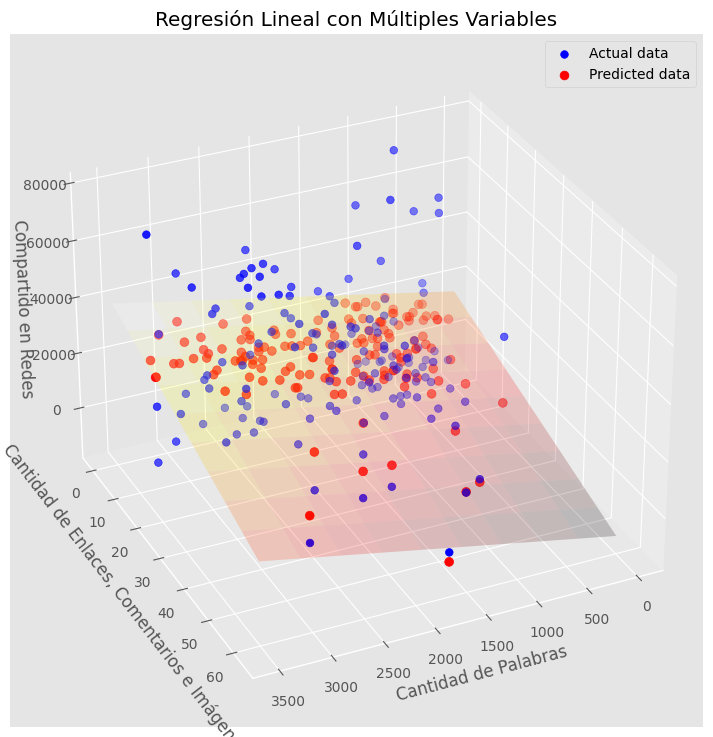

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Ensure 3D projection

xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
z = (nuevoX + nuevoY + regr2.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Plot the original data points in blue
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30, label='Actual data')

# Plot the predicted data points in red
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40, label='Predicted data')

ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

ax.legend()

# Show the plot
plt.show()